Loading the data bundle

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
from datetime import timedelta

#os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), '.zipline')
os.listdir(os.environ['ZIPLINE_ROOT'])

import zipline
from zipline.data import bundles

from zipline.utils.calendars import get_calendar
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.factors import CustomFactor
from zipline.research.utils import get_pricing, create_data_portal, create_pipeline_engine

# Set the trading calendar
trading_calendar = get_calendar('NYSE')
bundle_name = 'alpaca_api'
start_date = pd.Timestamp('2015-12-31', tz='utc')
pipeline_start_date = start_date + timedelta(days=365*2+10)
end_date = pd.Timestamp('2020-12-28', tz='utc')
data_portal = create_data_portal(bundle_name, trading_calendar, start_date)

Creating the Pipeline Engine

In [2]:
engine = create_pipeline_engine(bundle_name)

Let’s create our custom factor

In [3]:
from zipline.pipeline.factors import CustomFactor, Returns
from zipline.pipeline.data import USEquityPricing

class YearlyReturns(CustomFactor):
    inputs = [USEquityPricing.close]
    window_length = 252
    def compute(self, today, assets, out, prices):
        start = self.window_length
        out[:] = (prices[-1] - prices[-start])/prices[-start]

Our Pipeline

In [4]:
from zipline.pipeline.domain import US_EQUITIES
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline import Pipeline
from zipline.pipeline.classifiers.custom.sector import ZiplineTraderSector, SECTOR_LABELS

universe = USEquityPricing
universe = AverageDollarVolume(window_length = 5)

pipeline = Pipeline(
    columns = {
            'MyFactor' : YearlyReturns(),
#             'Returns': Returns(window_length=252),  # same as YearlyRetruns
            'Sector' : ZiplineTraderSector()
    }, domain=US_EQUITIES
)


Run the Pipeline

In [5]:
# Run our pipeline for the given start and end dates
factors = engine.run_pipeline(pipeline, pipeline_start_date, end_date)

factors.head()

MyFactor  Sector
2018-01-09 00:00:00+00:00 Equity(1 [DAUG])  0.000000      -1
                          Equity(2 [MSI])   0.160705      10
                          Equity(3 [BDCX])  0.000000      -1
                          Equity(4 [JRVR]) -0.140113       6
                          Equity(5 [FLT])   0.208027       8

Data preparation

In [6]:
asset_list = factors.index.levels[1].unique()

prices = get_pricing(
        data_portal,
        trading_calendar,
        asset_list,
        pipeline_start_date,
        end_date)
prices.head()



,Equity(1 [DAUG]),Equity(2 [MSI]),Equity(3 [BDCX]),Equity(4 [JRVR]),Equity(5 [FLT]),Equity(6 [EAOR]),Equity(7 [SSKN]),Equity(8 [NJV]),Equity(9 [RAVN]),Equity(10 [THC]),...,Equity(11052 [MUJ]),Equity(11053 [AHT-H]),Equity(11054 [TCRR]),Equity(11055 [EGBN]),Equity(11056 [ETV]),Equity(11057 [QPT]),Equity(11058 [CCAC.U]),Equity(11059 [VRTX]),Equity(11060 [PSO]),Equity(11061 [NGVC])
2018-01-10 00:00:00+00:00,30.26,92.36,25.67,35.82,200.92,25.62,1.460,14.100,35.75,14.780,...,14.21,23.03,15.155,60.50,15.445,25.01,10.2,157.40,9.780,8.13
2018-01-11 00:00:00+00:00,30.26,93.54,25.67,35.95,202.60,25.62,1.480,14.097,36.20,15.430,...,14.18,23.03,15.155,61.65,15.480,25.01,10.2,158.35,9.800,8.43
2018-01-12 00:00:00+00:00,30.26,96.57,25.67,36.14,203.34,25.62,1.438,13.980,36.25,16.240,...,14.09,23.03,15.155,61.40,15.480,25.01,10.2,157.87,9.910,8.32
2018-01-16 00:00:00+00:00,30.26,95.84,25.67,35.55,201.74,25.62,1.390,14.120,36.25,16.200,...,14.07,23.03,15.155,60.80,15.500,25.01,10.2,155.70,9.835,8.56
2018-01-17 00:00:00+00:00,30.26,97.29,25.67,35.52,203.42,25.62,1.380,14.200,36.05,16.385,...,14.08,23.03,15.155,61.90,15.520,25.01,10.2,156.96,9.465,8.45


In [7]:
import alphalens as al

In [8]:
factor_data = al.utils.get_clean_factor_and_forward_returns(
        factor=factors["MyFactor"],
        prices=prices,
        quantiles=5,
        periods=[1, 5, 10],
        groupby=factors["Sector"],
        binning_by_group=True,
        groupby_labels=SECTOR_LABELS,
    max_loss=0.8)

Dropped 33.7% entries from factor data: 1.5% in forward returns computation and 32.2% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 80.0%, not exceeded: OK!


In [9]:
factor_data.head(10)

1D        5D       10D  \
date                      asset                                             
2018-01-10 00:00:00+00:00 Equity(2 [MSI])    0.012776  0.055760  0.057601   
                          Equity(5 [FLT])    0.008362  0.012293  0.055495   
                          Equity(9 [RAVN])   0.012587 -0.006993  0.034965   
                          Equity(16 [PFIN])  0.037014  0.036767 -0.061073   
                          Equity(21 [UMC])  -0.004184  0.012552  0.037657   
                          Equity(25 [NDSN])  0.012564  0.025539  0.017575   
                          Equity(27 [NGMS])  0.000000  0.000000  0.000000   
                          Equity(28 [YORW])  0.006279  0.001570 -0.004710   
                          Equity(34 [IVAC])  0.011194  0.007463  0.014925   
                          Equity(35 [APPF])  0.007389  0.051724  0.068966   

                                               factor              group  \
date                      asset                                            
2018-01-10 00:00:00+00:00 Equity(2 [MSI])    0.152076         Technology   
                          Equity(5 [FLT])    0.206189      Miscellaneous   
                          Equity(9 [RAVN])   0.141935      Capital Goods   
                          Equity(16 [PFIN]) -0.055687         Technology   
                          Equity(21 [UMC])   0.263959         Technology   
                          Equity(25 [NDSN])  0.180320      Capital Goods   
                          Equity(27 [NGMS])  0.000000  Consumer Services   
                          Equity(28 [YORW]) -0.089762   Public Utilities   
                          Equity(34 [IVAC]) -0.364286         Technology   
                          Equity(35 [APPF])  0.731501         Technology   

                                             factor_quantile  
date                      asset                               
2018-01-10 00:00:00+00:00 Equity(2 [MSI])                3.0  
                          Equity(5 [FLT])                4.0  
                          Equity(9 [RAVN])               3.0  
                          Equity(16 [PFIN])              1.0  
                          Equity(21 [UMC])               4.0  
                          Equity(25 [NDSN])              3.0  
                          Equity(27 [NGMS])              2.0  
                          Equity(28 [YORW])              1.0  
                          Equity(34 [IVAC])              1.0  
                          Equity(35 [APPF])              5.0

Running Alphalens

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-0.999998,0.000000,-0.364214,0.237446,1093920,20.863125
2.0,-0.866743,0.183046,-0.113212,0.132609,1169954,22.313238
3.0,-0.768967,0.415624,-0.018782,0.092169,1069844,20.403950
4.0,-0.671378,1.017834,0.101308,0.144786,882855,16.837716
5.0,-0.505435,38139.000000,6.975808,264.294130,1026745,19.581971


Returns Analysis


,1D,5D,10D
Ann. alpha,0.157,0.233,0.251
beta,-0.237,-0.499,-0.519
Mean Period Wise Return Top Quantile (bps),-3.255,-31.627,-49.545
Mean Period Wise Return Bottom Quantile (bps),10.764,0.316,-16.404
Mean Period Wise Spread (bps),-14.019,-30.519,-29.088


<Figure size 432x288 with 0 Axes>

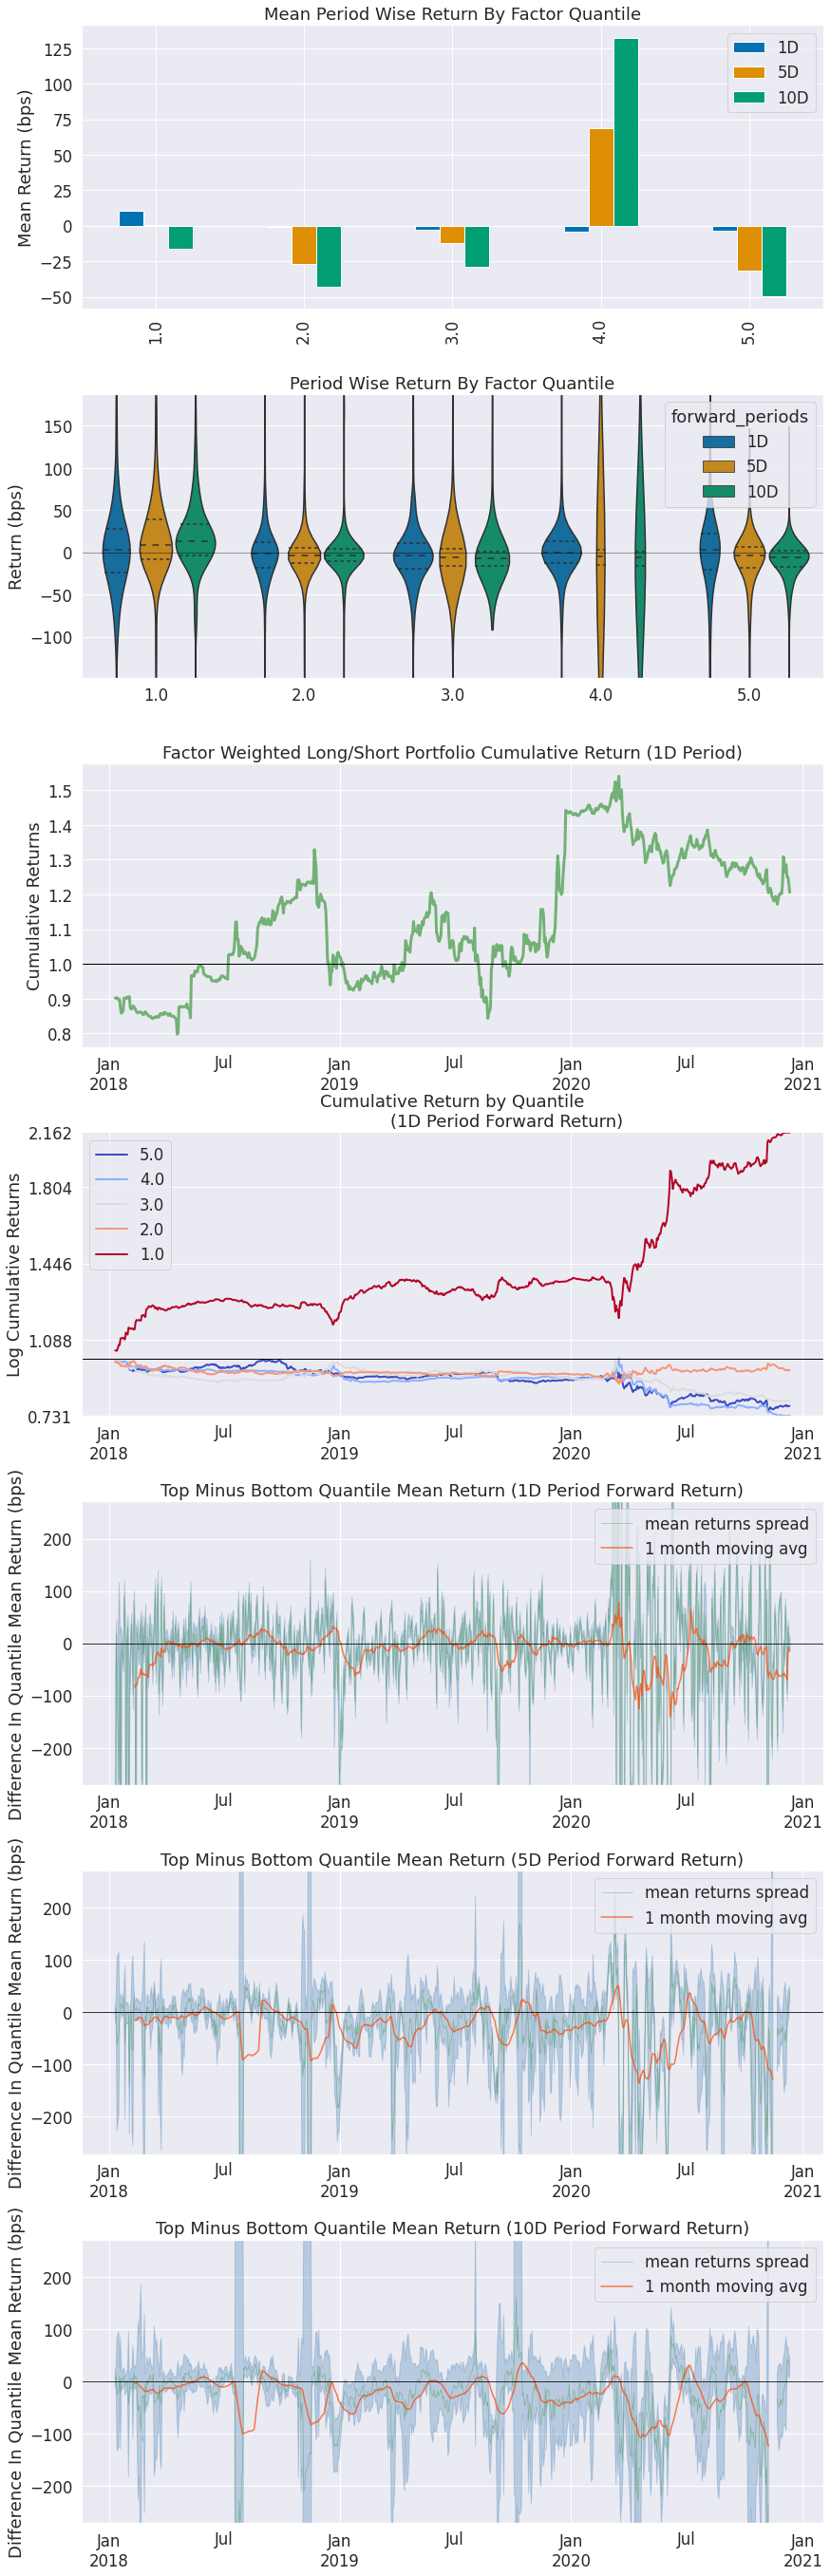

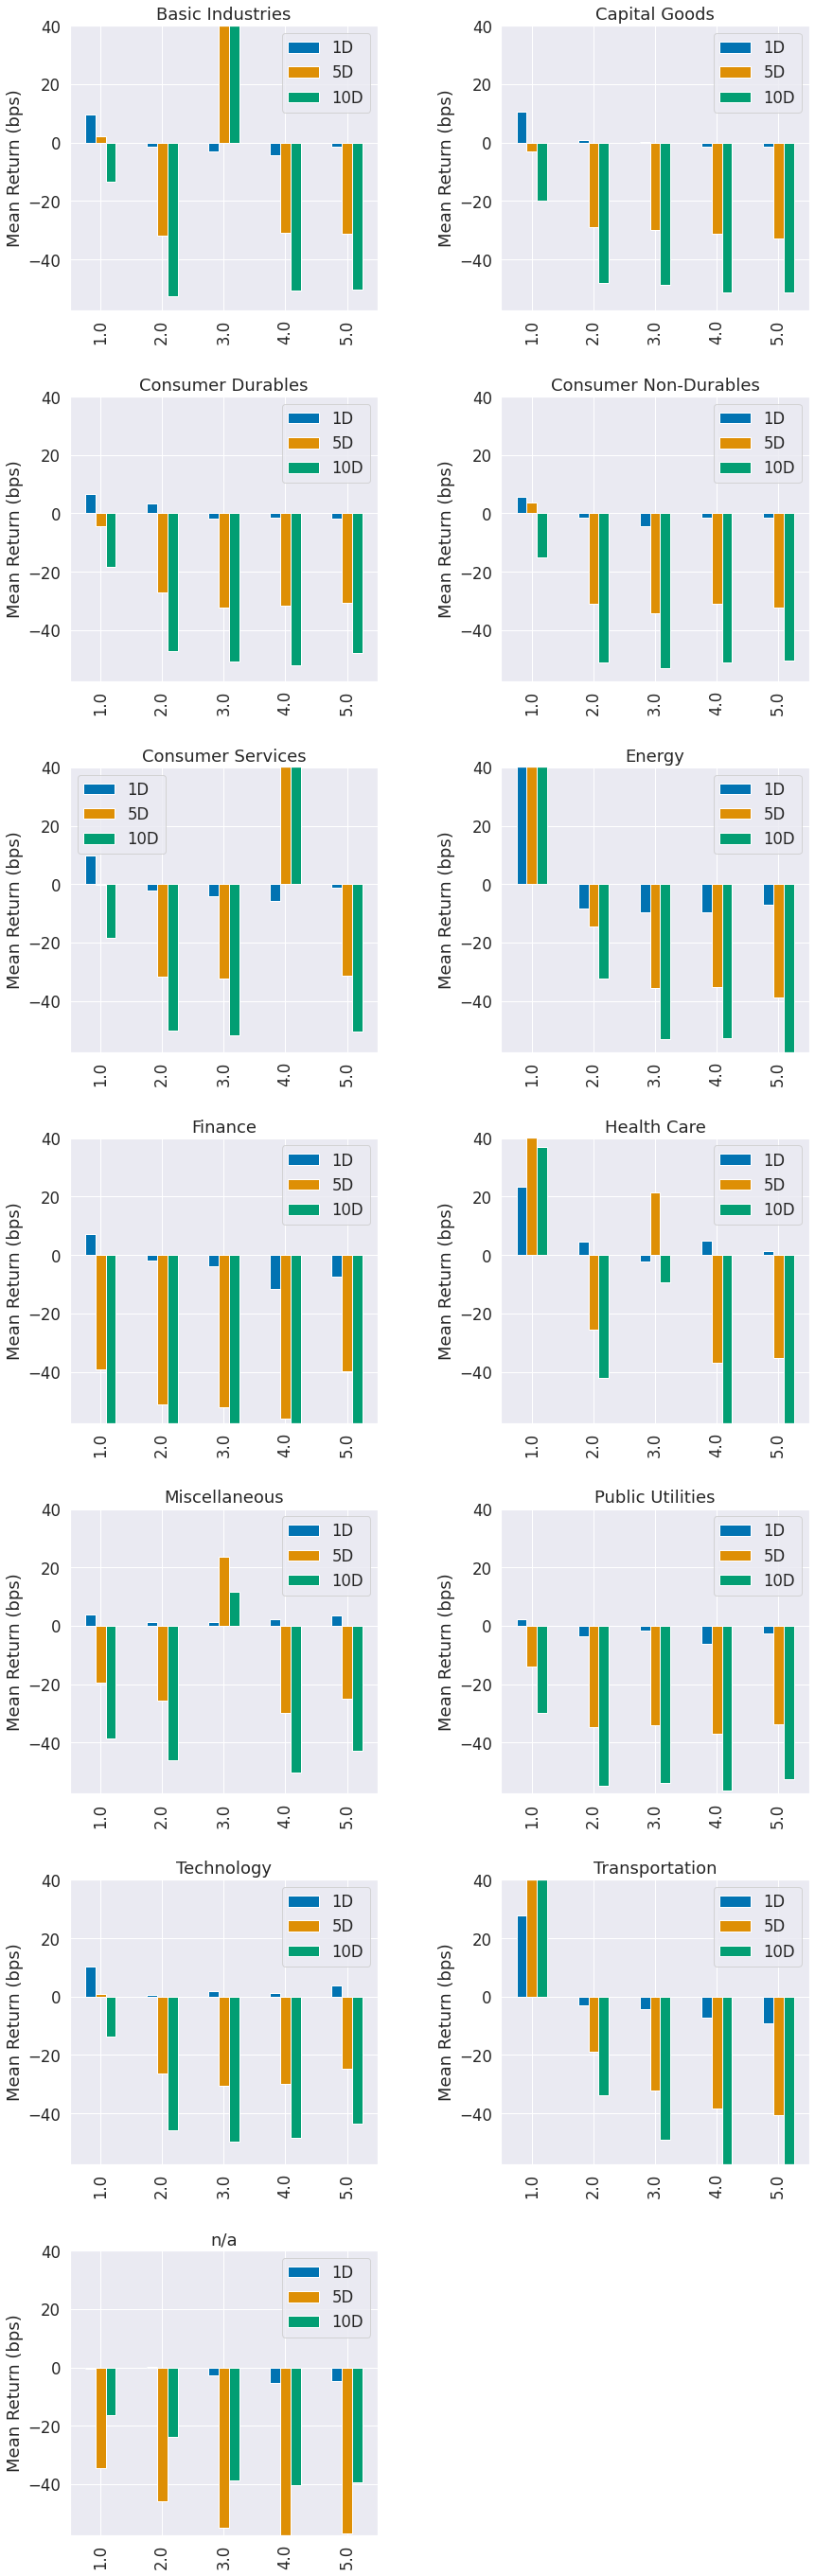

Information Analysis


,1D,5D,10D
IC Mean,0.011,0.008,0.002
IC Std.,0.149,0.163,0.164
Risk-Adjusted IC,0.071,0.048,0.011
t-stat(IC),1.920,1.316,0.308
p-value(IC),0.055,0.188,0.758
IC Skew,-0.469,-0.853,-0.809
IC Kurtosis,0.390,0.940,0.806


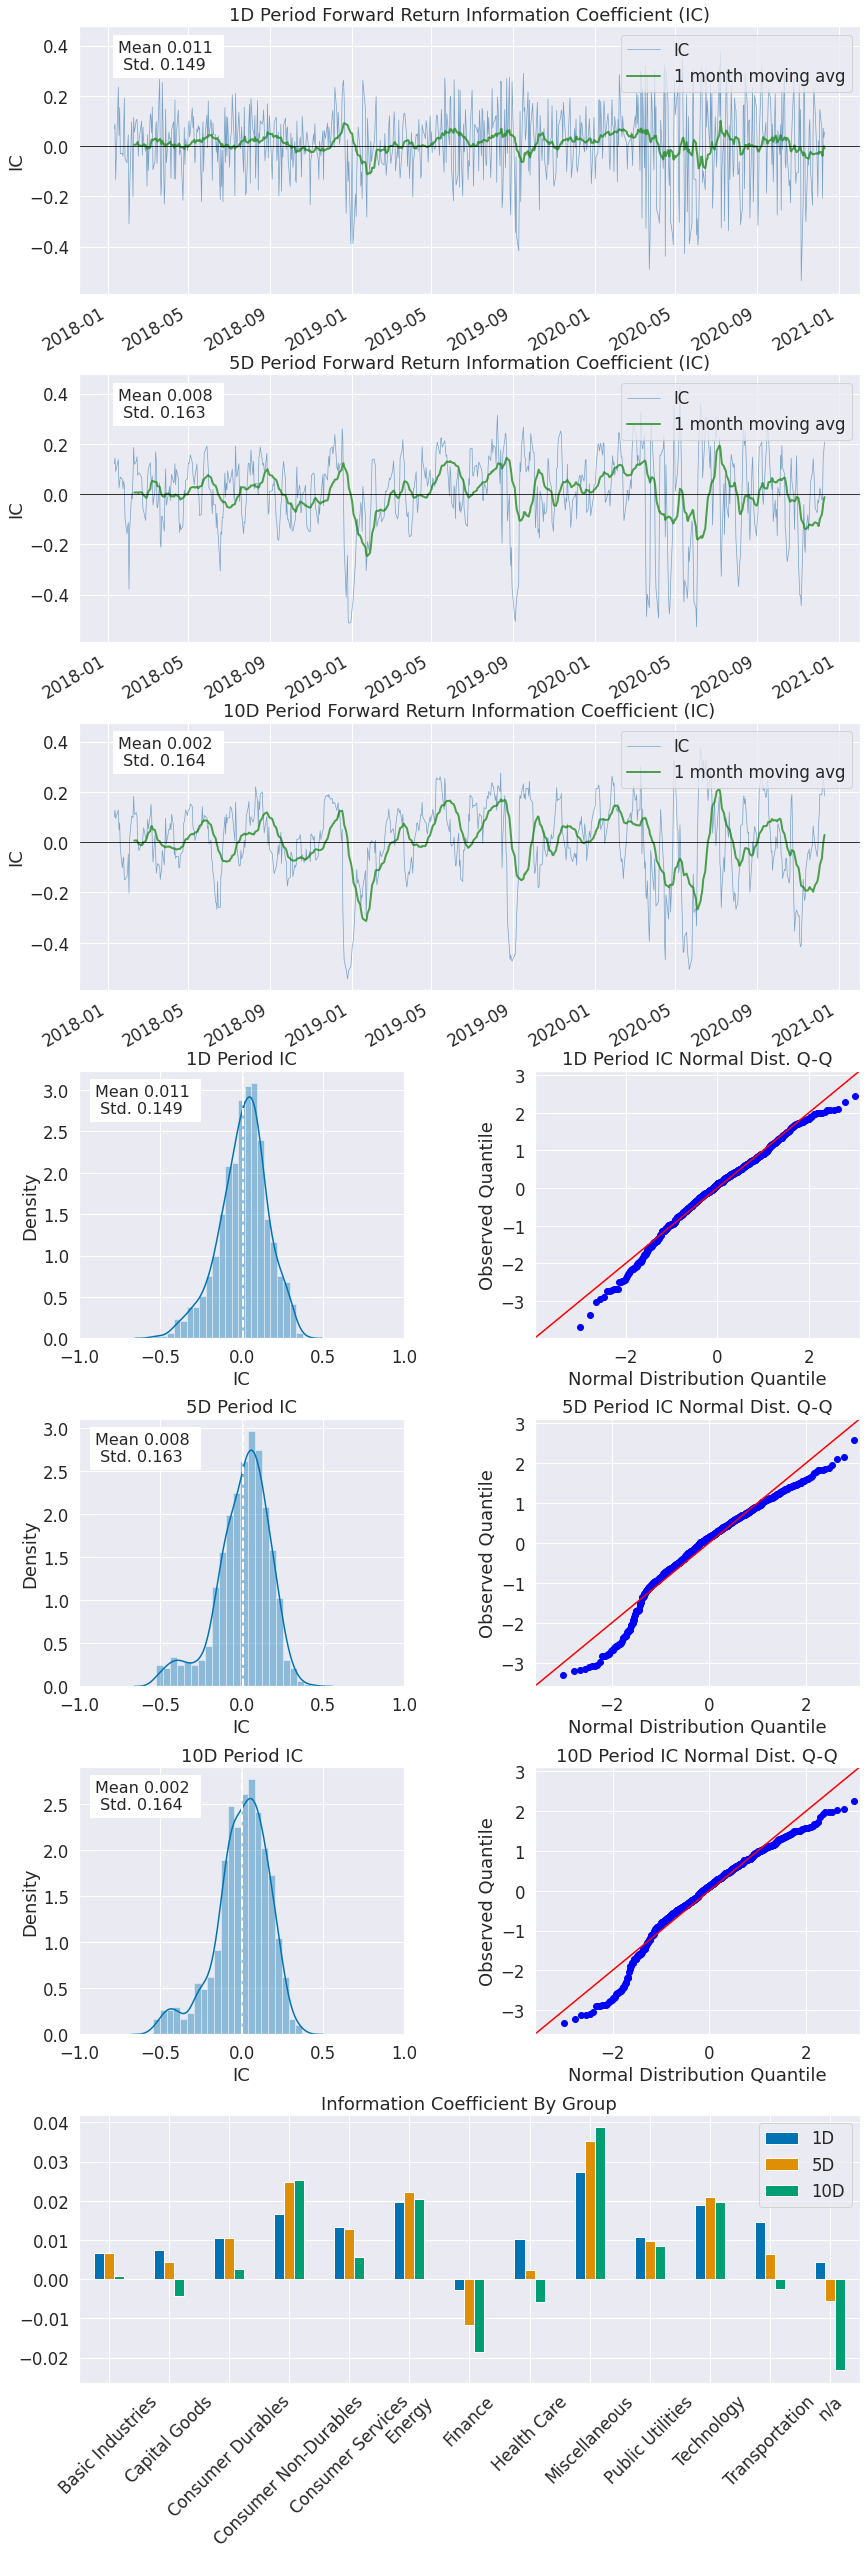

Turnover Analysis


,1D,5D,10D
Quantile 1.0 Mean Turnover,0.087,0.187,0.242
Quantile 2.0 Mean Turnover,0.140,0.290,0.390
Quantile 3.0 Mean Turnover,0.159,0.315,0.412
Quantile 4.0 Mean Turnover,0.161,0.317,0.405
Quantile 5.0 Mean Turnover,0.092,0.195,0.255


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.986,0.956,0.923


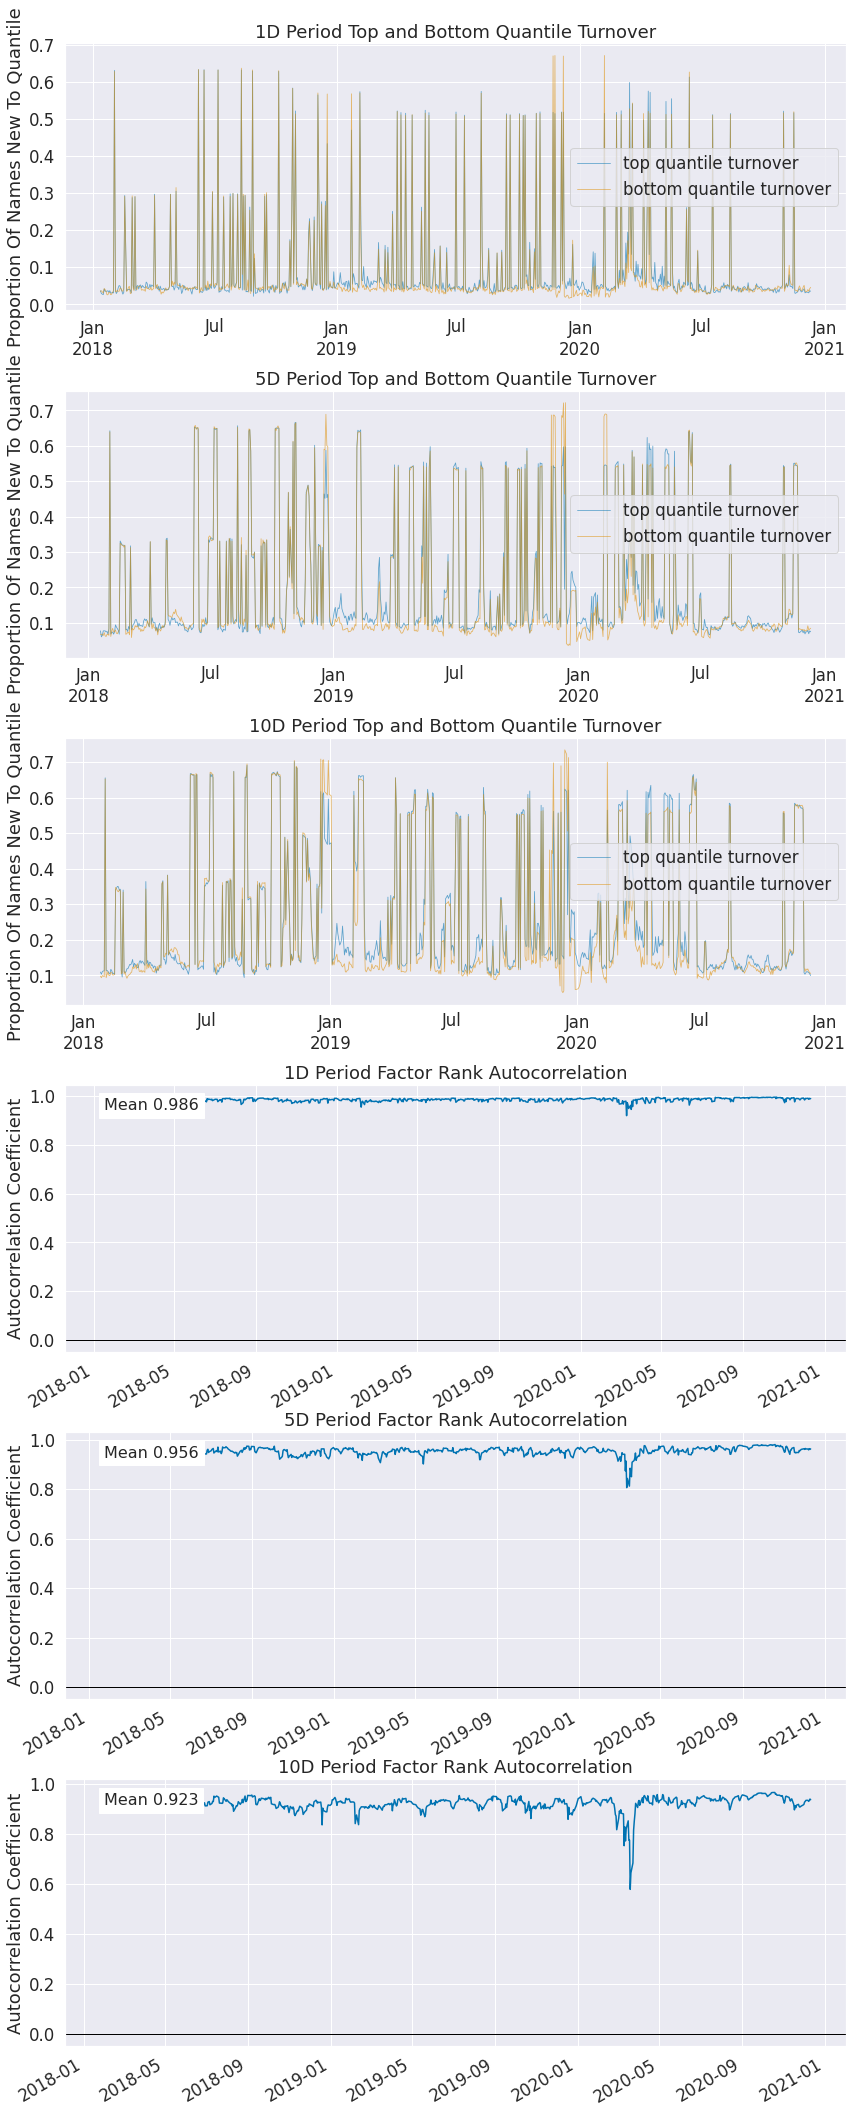

In [10]:
al.tears.create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)

These reports are also available:
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=True,
                                   group_neutral=False,
                                   by_group=False)

al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

al.tears.create_turnover_tear_sheet(factor_data)

al.tears.create_event_returns_tear_sheet(factor_data, prices,
                                         avgretplot=(5, 15),
                                         long_short=True,
                                         group_neutral=False,
                                         std_bar=True,
                                         by_group=False)

Working with Pyfolio

In [11]:
pf_returns, pf_positions, pf_benchmark = al.performance.create_pyfolio_input(factor_data,
                                        period='1D',
                                        capital=100000,
                                        long_short=True,
                                        group_neutral=False,
                                        equal_weight=True,
                                        quantiles=[1,5],
                                        groups=None,
                                        benchmark_period='1D')


Start date,2018-01-10
End date,2020-12-11
Total months,50
,Backtest
Annual return,-11.809%
Cumulative returns,-41.262%
Annual volatility,8.119%
Sharpe ratio,-1.51
Calmar ratio,-0.29
Stability,0.76
Max drawdown,-41.42%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.42,2018-01-11,2020-12-08,NaT,NaN
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


ConversionError: Failed to convert value(s) to axis units: (NaT, Timestamp('2020-12-11 00:00:00+0000', tz='UTC', freq='D'))

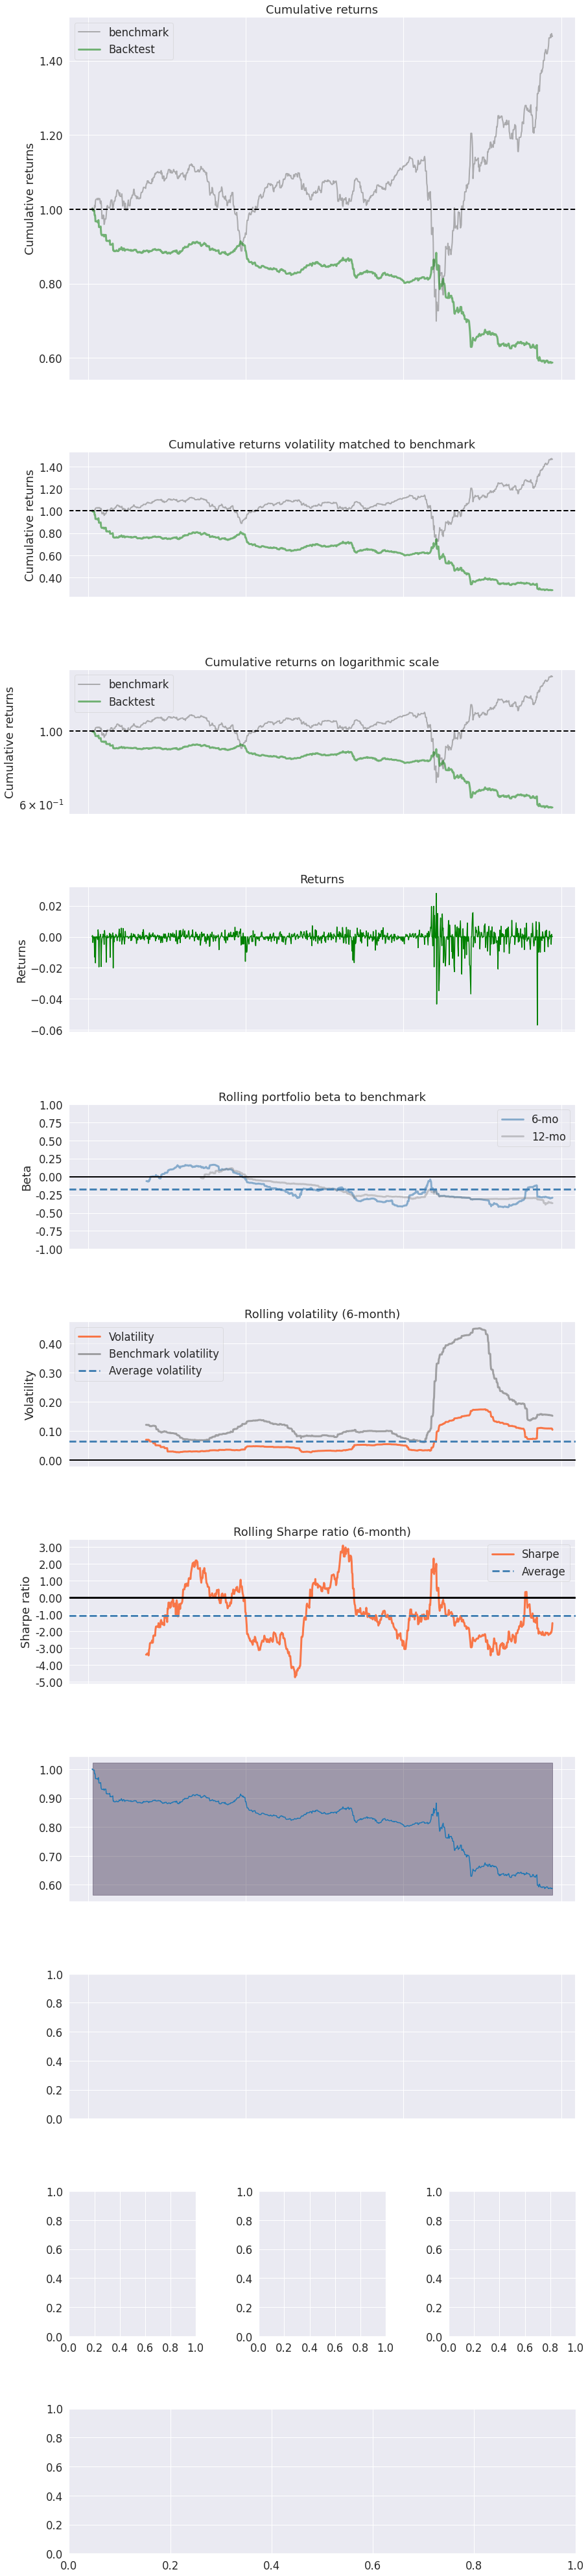

In [12]:
import pyfolio as pf
pf.tears.create_full_tear_sheet(pf_returns,
                                positions=pf_positions,
                                benchmark_rets=pf_benchmark,
                                hide_positions=True)
